<a href="https://colab.research.google.com/github/mifm/mifm_test/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!pip install topfarm

In [0]:
import numpy as np
import os
from topfarm.cost_models.dummy import DummyCost
from topfarm._topfarm import TopFarmProblem
from openmdao.drivers.doe_generators import FullFactorialGenerator
from topfarm.plotting import TurbineTypePlotComponent, NoPlot

   x: ['plot_comp.x']
   y: ['plot_comp.y']

   x: ['plot_comp.x']
   y: ['plot_comp.y']



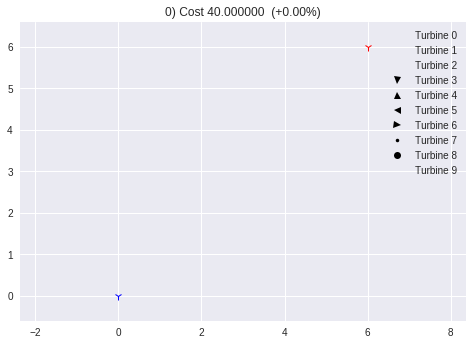

   x: ['plot_comp.x']
   y: ['plot_comp.y']

[2. 6.]
   x: ['plot_comp.x']
   y: ['plot_comp.y']



(0.0, {'type': array([2., 6.])})

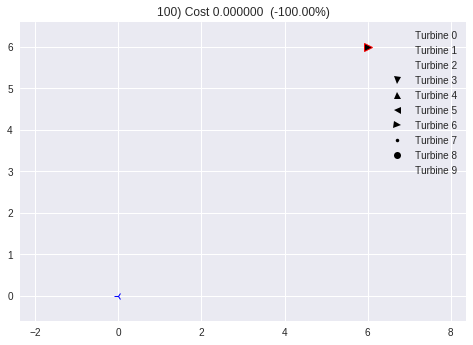

In [15]:
# ------------------------ INPUTS ------------------------

# define the conditions for the wind farm
positions = np.array([[0, 0], [6, 6]])  # initial turbine pos
optimal_types = np.array([[2], [6]])  # optimal layout

# ===============================================================================
# Setup the problem and plotting
# ===============================================================================

try:
    import matplotlib.pyplot as plt
    plt.gcf()
    plot_comp = TurbineTypePlotComponent(
        turbine_type_names=["Turbine %d" % i for i in range(10)],
        plot_initial=False,
        delay=0.1, legendloc=0)
    plot = True
except RuntimeError:
    plot_comp = NoPlot()
    plot = False

# create the wind farm
tf = TopFarmProblem(
    design_vars={'type': ([0, 0], 0, 9)},
    cost_comp=DummyCost(optimal_types, ['type']),
    plot_comp=plot_comp,
    driver=FullFactorialGenerator(10))

# ===============================================================================
# #  Run the optimization
# ===============================================================================
state = {'x': positions[:, 0], 'y': positions[:, 1]}
cost, state, recorder = tf.optimize(state)

# ===============================================================================
# plot and prin the the final, optimal types
# ===============================================================================
print(state['type'])
tf.evaluate(state)